In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<img src="RandomForest.png" width="800" height="500">

In [5]:
loan_df = pd.read_csv('loan_data.csv')

In [6]:
loan_df.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [7]:
loan_df['paid'] = np.where(loan_df['not.fully.paid']== 0, 1, 0)

In [8]:
loan_df.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0,1
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1,0
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1,0
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0,1
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0,1


In [9]:
loan_df.drop('not.fully.paid', axis=1, inplace=True)

In [10]:
loan_df.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,1
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,1
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,1
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,1
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,0
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,0
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,1
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,1


In [13]:
loan_df.shape

(9578, 14)

In [14]:
loan_df['paid'].value_counts()

paid
1    8045
0    1533
Name: count, dtype: int64

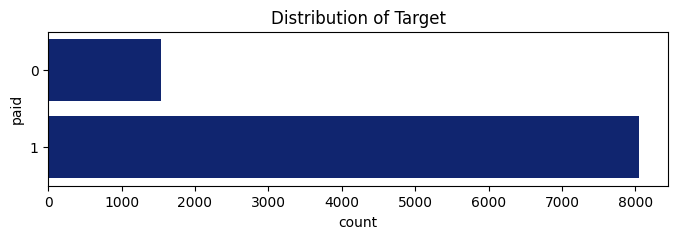

In [12]:
plt.figure(figsize=(8,2))
sns.set_palette("dark")
sns.countplot(loan_df, y='paid', orient='h')
plt.title('Distribution of Target')
plt.show()

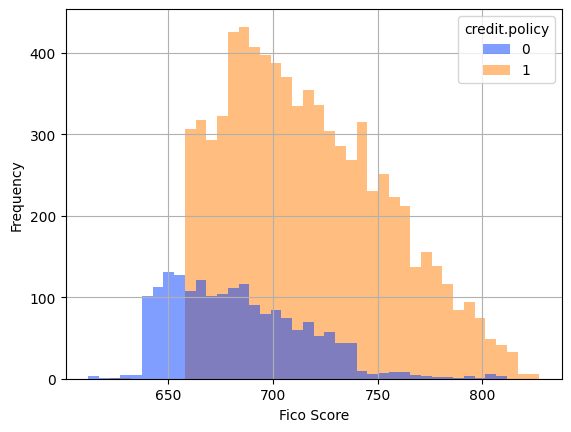

In [17]:
sns.histplot(loan_df, x='fico', edgecolor=None, hue='credit.policy')
sns.set_palette("bright")
plt.grid(True)
plt.ylabel('Frequency')
plt.xlabel('Fico Score')
plt.show()

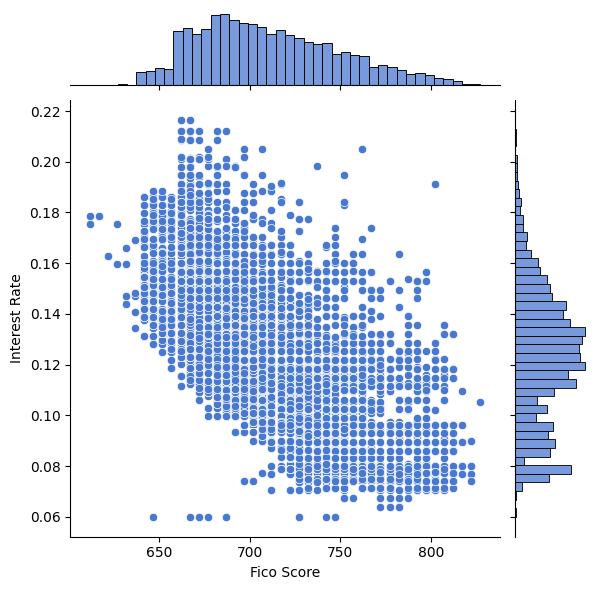

In [18]:
sns.set_palette("muted")
sns.jointplot(data=loan_df, x='fico', y='int.rate')
plt.xlabel('Fico Score')
plt.ylabel('Interest Rate')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [20]:
loan_df.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,1
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1


In [23]:
loan_2 = pd.get_dummies(data=loan_df, columns=['purpose'], drop_first=True, dtype='int')

In [24]:
loan_2

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,1,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,1,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,1,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,0,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,0,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,0,0,0,0,1,0,0


In [25]:
X = loan_2.drop('paid', axis=1)
y = loan_2['paid']

In [26]:
X

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,0,0,0,1,0,0


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.75, test_size=0.25)

In [29]:
cls = DecisionTreeClassifier()



In [31]:
cls.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
cls.score(X_train, y_train)

1.0

In [33]:
y_pred = cls.predict(X_test)

In [34]:
cls.score(X_test, y_test)

0.7265135699373695

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf_cls = RandomForestClassifier(n_estimators=200)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.75, test_size=0.25)

In [40]:
rf_cls.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [41]:
rf_cls.score(X_test, y_test)

0.8450939457202505

In [53]:

accuracy_scores = []

for trees in range(1, 50, 1):

    rf_cls = RandomForestClassifier(n_estimators=trees)
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.75, test_size=0.25)
    rf_cls.fit(X_train, y_train)
    accuracy_scores.append(rf_cls.score(X_test, y_test))
    # print(f' {trees}-accuracy: {rf_cls.score(X_test, y_test)}')



In [51]:
np.arange(1,30,1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

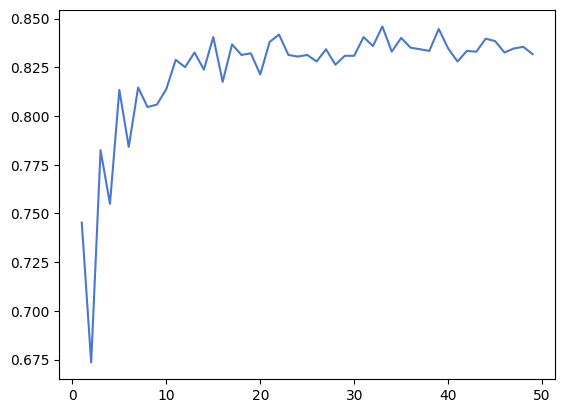

In [54]:
sns.lineplot(x=np.arange(1,50,1), y=np.array(accuracy_scores))
plt.show()

In [50]:
accuracy_scores

[0.7569937369519834,
 0.6613778705636744,
 0.7845511482254697,
 0.7590814196242172,
 0.8154488517745303,
 0.7841336116910229,
 0.82839248434238,
 0.8025052192066806,
 0.8242171189979123,
 0.8062630480167015,
 0.8400835073068893,
 0.8242171189979123,
 0.830062630480167,
 0.822964509394572,
 0.837160751565762,
 0.8379958246346555,
 0.8384133611691023,
 0.822964509394572,
 0.8325678496868476,
 0.8359081419624217,
 0.8313152400835073,
 0.8350730688935282,
 0.8296450939457203,
 0.824634655532359,
 0.8359081419624217,
 0.8317327766179541,
 0.8325678496868476,
 0.8313152400835073,
 0.8308977035490606]